In [1]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import math
import matplotlib.ticker as ticker
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Number_of_node=1000
Number_of_step=40001
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
font_path = './fonts/times.ttf'
font_prop = FontProperties(fname=font_path)
font_name = font_prop.get_name()
fonts = font_prop.get_name()
font1 = {'family': font_prop.get_name(), 'color': '#000000', 'weight': 'normal'}
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'



data_L1_cor1=np.loadtxt('./Datas/Degree_Radian=1.57_copling=0.39layer1(time)VS(Node).txt')
data_L2_cor1=np.loadtxt('./Datas/Degree_Radian=1.57_copling=0.39layer2(time)VS(Node).txt')


data_L1_cor2=np.loadtxt('./Datas/Degree_Radian=1.57_copling=2.11layer1(time)VS(Node).txt')
data_L2_cor2=np.loadtxt('./Datas/Degree_Radian=1.57_copling=2.11layer2(time)VS(Node).txt')


'plt.savefig("FigureS4_dpi300.png", dpi=300, bbox_inches=\'tight\', pad_inches=1, bbox_extra_artists=[])\nplt.savefig("FigureS4_dpi300.jpg", dpi=300, bbox_inches=\'tight\', pad_inches=1, bbox_extra_artists=[])\nplt.savefig("FigureS4.pdf")\nwith Image.open(\'FigureS4_dpi300.png\') as img:\n    img.save(\'FigureS4_dpi300.tiff\', format=\'TIFF\', compression=\'tiff_lzw\')\nplt.close()'

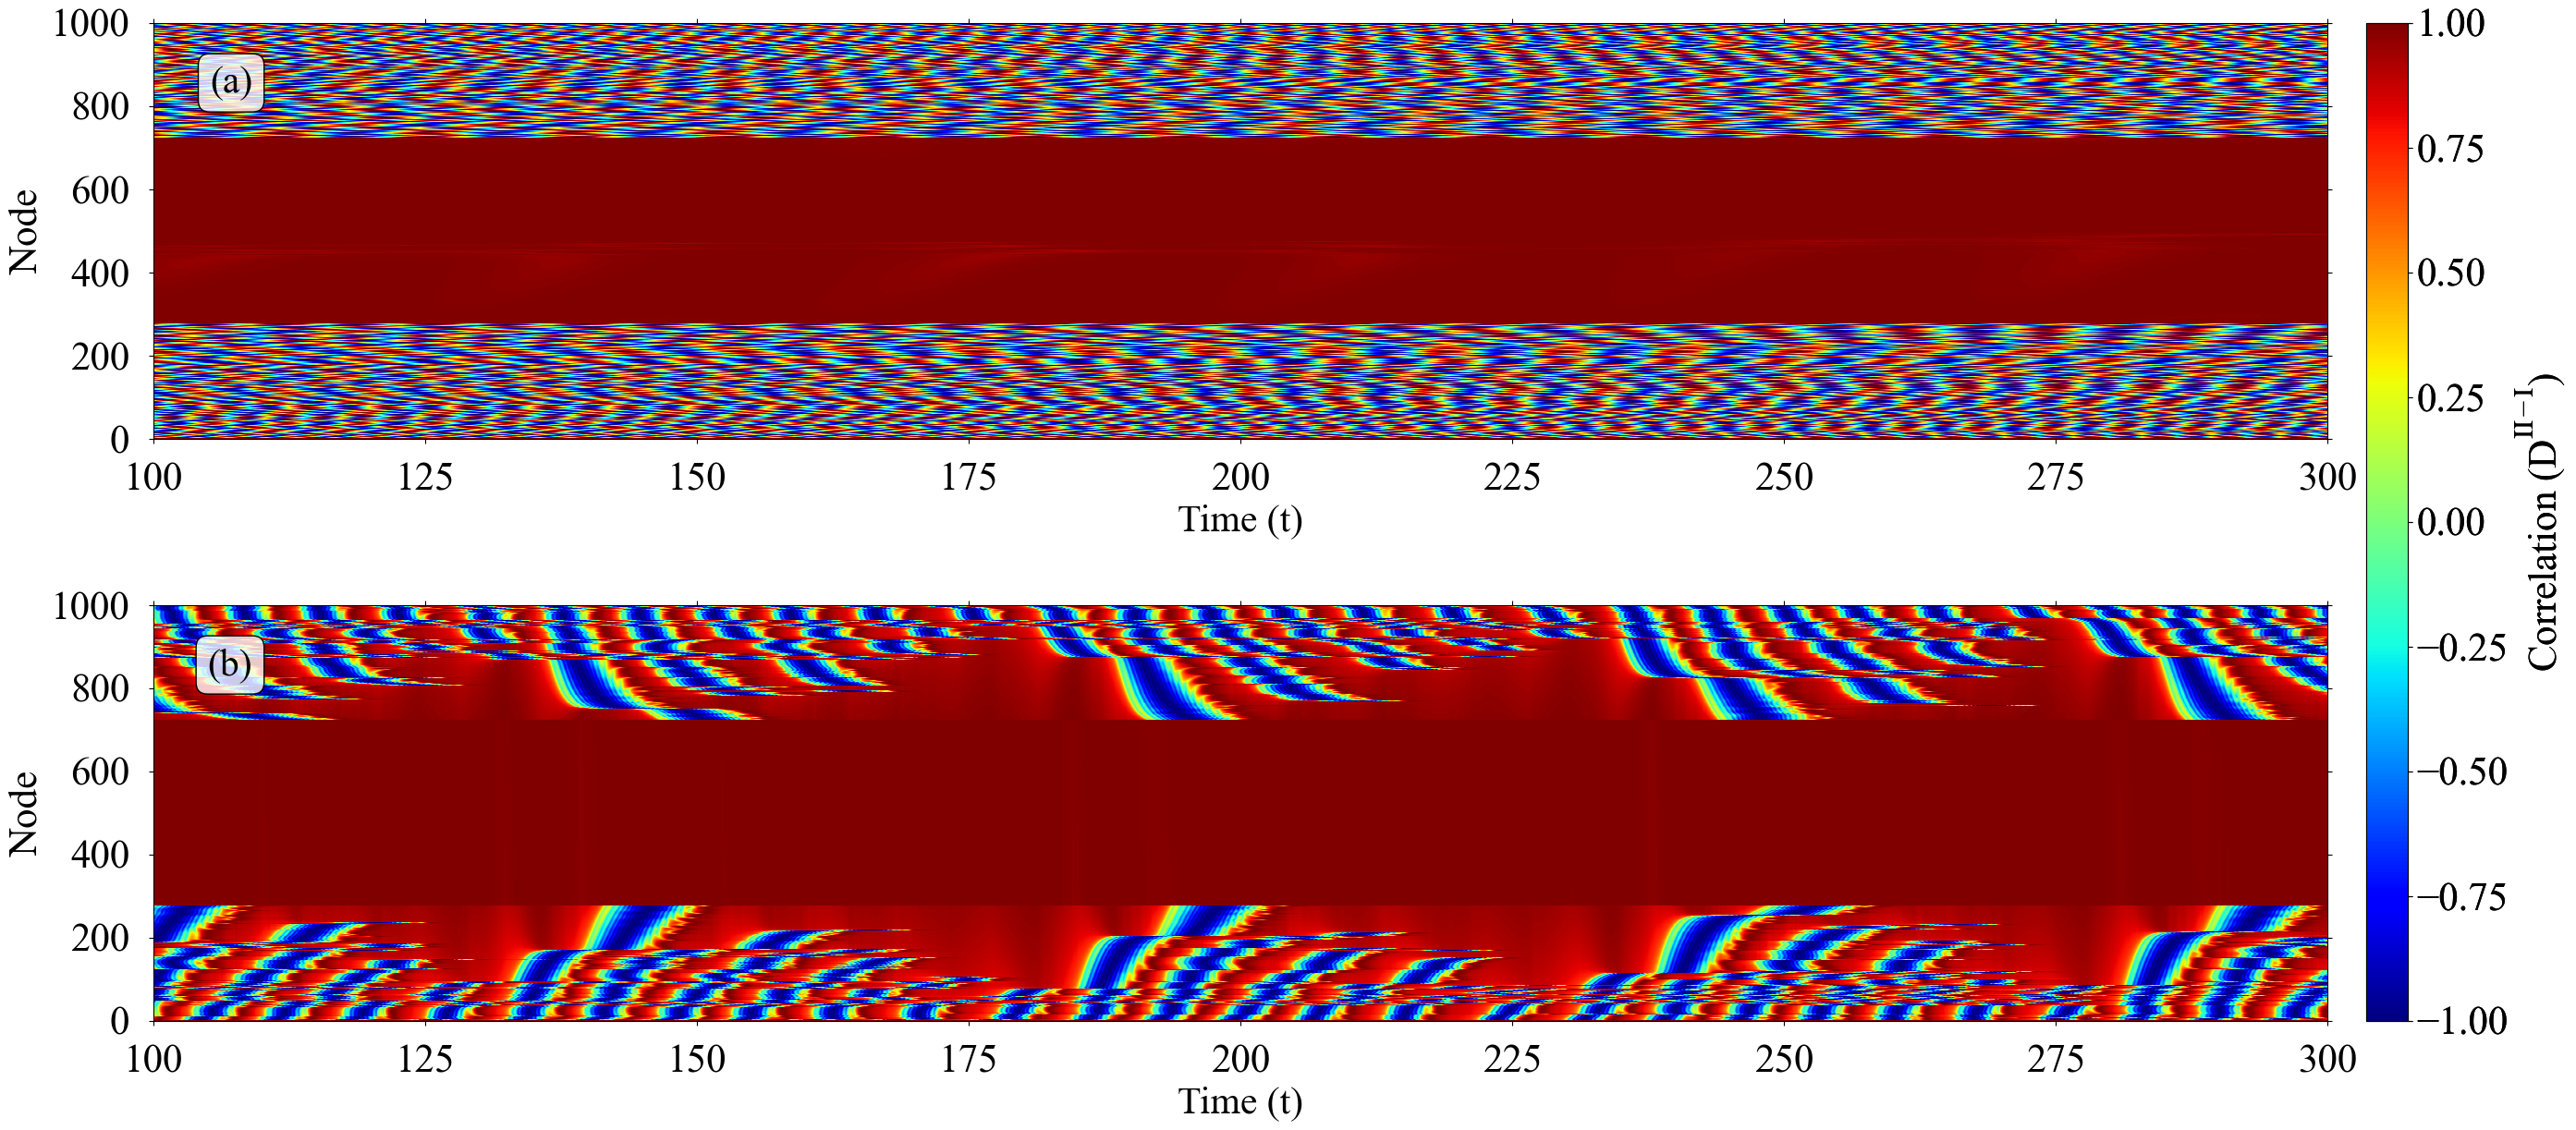

In [10]:
from matplotlib.ticker import AutoMinorLocator,MaxNLocator, MultipleLocator

def text_plot(axes):
    # Add text annotations for each subplot
    annotations = ['(a)', '(b)']
    for i, ax in enumerate(axes):
        ax.text(0.0456, 0.898, annotations[i], fontdict=font1, fontsize=30,
                transform=ax.transAxes, ha='right', va='top',
                bbox=dict(boxstyle="round", ec="#000000", fc=(1, 1, 1, 0.80)))

def plot_framework(number_of_pic):
    ax = plt.subplot(2, 1, number_of_pic)
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labeltop=False, pad=15)
    plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelright=False, pad=15)
    plt.xticks(font=fonts,fontsize=31,color= '#000000')
    plt.yticks(font=fonts,fontsize=31,color= '#000000')
    return ax




fig = plt.figure()

axes=[plot_framework(i) for i in range(1, 3)]

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
def plot_cor_time(ax,Matrix_sor_0_2PI1,Matrix_sor_0_2PI2,str1,str2):
    
    Corolation = [[0 for x in range(Number_of_node)] for y in range(Number_of_step)] 
    for timeforloop in range(0, Number_of_step):
        for y in range(0, Number_of_node):  # for timeforloop step  
            Corolation[timeforloop][y] = math.cos(Matrix_sor_0_2PI2[timeforloop][y] - Matrix_sor_0_2PI1[timeforloop][y])  # [satr][soton]

    figure = plt.gcf()  # get current figure
    data_Corolation = ax.pcolormesh(np.transpose(Corolation), cmap='jet', vmin=-1, vmax=1)  # binary #hsv
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/100)))
    ax.tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True)
    ax.set_xlabel('Time (t)', fontdict=font1, fontsize=30)
    ax.set_ylabel('Node', fontdict=font1, fontsize=31)
    sub_ax = plt.axes([0.922, 0.24, 0.016, 0.54]) # [ , ,arz,ertefa]
    cbar = figure.colorbar(data_Corolation, cax=sub_ax, ticks=np.linspace(-1, 1, 9))
    cbar.set_label('Correlation ($\mathrm{D}^\mathrm{II-I}$)', fontdict=font1, fontsize=31)
    cbar.ax.tick_params(labelsize=31)
    #ax.set_xlim([100, 300])
    ax.set_xlim([10000, 30000])
    ax.set_ylim([0, 1000])
    #ax.set_xticks([100,125,150,175,200,225,250,275,300])

    for label in cbar.ax.get_yticklabels():
        label.set_fontname(fonts)
        label.set_fontsize(31)
        label.set_color('#000000') 
    pass

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

plot_cor_time(axes[0],data_L1_cor1,data_L2_cor1,'a','b')

plot_cor_time(axes[1],data_L1_cor2,data_L2_cor2,'a','b')

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@



text_plot(axes)


y_lim=0.22
x_lim=0.08
plt.subplots_adjust(top = 1-y_lim, bottom=y_lim+0.02,left=x_lim-0.014,right=1-x_lim-0.014, hspace=0.4, wspace=0.3)
plt.gcf().set_size_inches(28, 20)

from PIL import Image
plt.savefig("FigureS4_dpi100_6.jpg", dpi=100)

#plt.subplots_adjust(right=0.72,left= 0.0,top = 1.0, bottom=0.0, hspace=0.28, wspace=0.38)
#plt.gcf().set_size_inches(44, 24)
'''plt.savefig("FigureS4_dpi300.png", dpi=300, bbox_inches='tight', pad_inches=1, bbox_extra_artists=[])
plt.savefig("FigureS4_dpi300.jpg", dpi=300, bbox_inches='tight', pad_inches=1, bbox_extra_artists=[])
plt.savefig("FigureS4.pdf")
with Image.open('FigureS4_dpi300.png') as img:
    img.save('FigureS4_dpi300.tiff', format='TIFF', compression='tiff_lzw')
plt.close()'''